In [1]:
import pandas as pd

# Load dataset
df_churn = pd.read_csv("D:/User Data/Documents/Sem 6 - Machine Learning and Related Applications/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Basic info
print("Dataset Shape:", df_churn.shape)
print("\nFirst 5 Rows:")
df_churn.head()

Dataset Shape: (7043, 21)

First 5 Rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check for missing values
print("\nMissing Values Summary:")
print(df_churn.isnull().sum())


Missing Values Summary:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
df_churn.dtypes
#print("Dataset Shape:", df_churn.shape)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
print("Dataset Shape, before remove:", df_churn.shape)

df_churn.drop_duplicates(inplace=True)

print("Dataset Shape, after remove:", df_churn.shape)

Dataset Shape, before remove: (7043, 21)
Dataset Shape, after remove: (7043, 21)


In [11]:
# Drop rows with missing TotalCharges
df_churn["TotalCharges"] = pd.to_numeric(df_churn["TotalCharges"], errors='coerce')
df_churn.dropna(subset=["TotalCharges"], inplace=True)

# Drop customerID (not useful for prediction)
df_churn.drop(columns=["customerID"], inplace=True)

df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df_churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
# df_churn.to_csv('D:/User Data/Documents/Sem 6 - Machine Learning and Related Applications/Telco-Customer-Churn.csv', index=False)

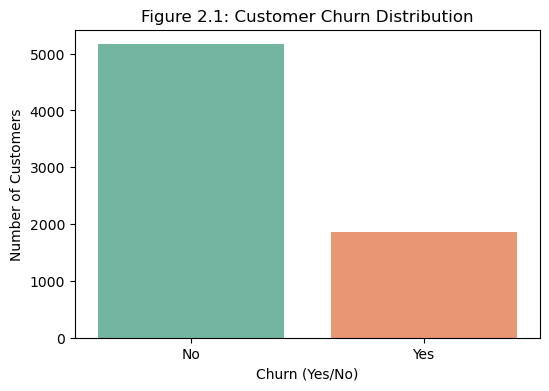

In [15]:
# Overall Churn Distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', hue='Churn', data=df_churn, palette='Set2', legend=False)
plt.title('Figure 2.1: Customer Churn Distribution')
plt.xlabel('Churn (Yes/No)')
plt.ylabel('Number of Customers')
plt.show()

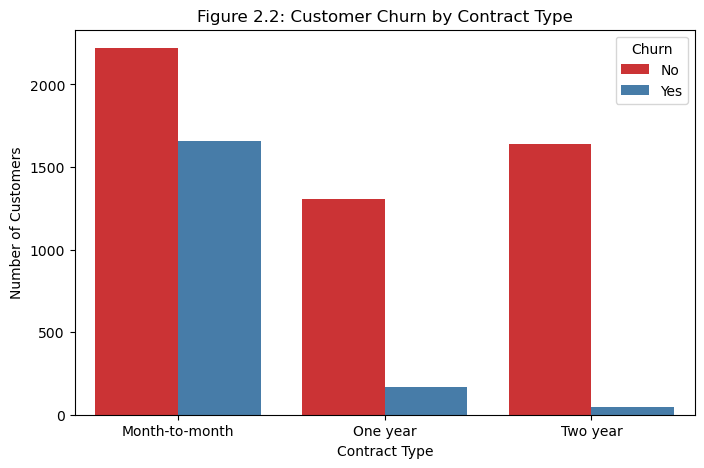

In [16]:
# Churn by Contract Type

plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df_churn, palette='Set1')
plt.title('Figure 2.2: Customer Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn', loc='upper right')
plt.show()

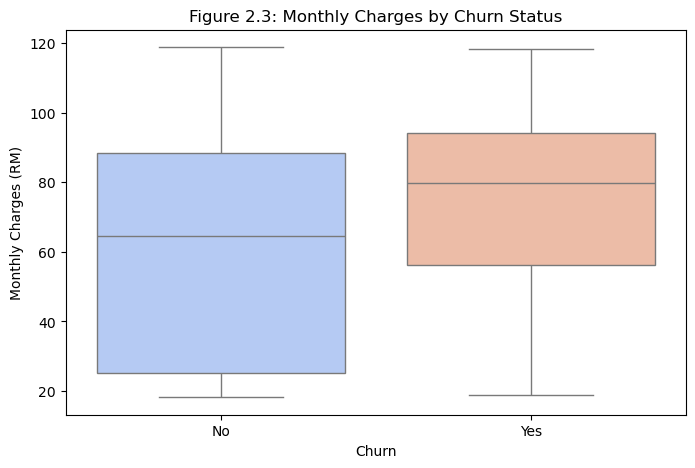

In [17]:
# Monthly Charges vs Churn

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', hue='Churn', data=df_churn, palette='coolwarm', legend=False)
plt.title('Figure 2.3: Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges (RM)')
plt.show()

In [27]:
# Feature Engineering STEP 1: Encode Categorical Data

# Make a copy to be safe
df_churn_encoded = df_churn.copy()

# Convert categorical variables to dummy/indicator variables
df_churn_encoded = pd.get_dummies(df_churn, drop_first=True)

print("Data encoding complete!")
print("Encoded dataset shape:", df_churn_encoded.shape)
df_churn_encoded.head()

Data encoding complete!
Encoded dataset shape: (7032, 31)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [127]:
# df_churn_encoded.to_csv('D:/User Data/Documents/Sem 6 - Machine Learning and Related Applications/Telco-Customer-Churn_done.csv', index=False)

In [29]:
# STEP 2
X = df_churn_encoded.drop('Churn_Yes', axis=1)
y = df_churn_encoded['Churn_Yes']

# STEP 3 - Split
X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [31]:
# LOGISTIC REGRESSION CLASSIFICATION MODEL
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=5000, solver='lbfgs') # optimization algorithm used to find the best model weights

# Train the model
log_reg.fit(X_train_churn, y_train_churn)

# Predict on test data
y_pred_churn = log_reg.predict(X_test_churn)

# Evaluate model
accuracy = accuracy_score(y_test_churn, y_pred_churn)
precision = precision_score(y_test_churn, y_pred_churn)
recall = recall_score(y_test_churn, y_pred_churn)
f1 = f1_score(y_test_churn, y_pred_churn)

print("Logistic Regression Model (Classification) Performance:")
print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1-score : {f1:.3f}")

Logistic Regression Model (Classification) Performance:
Accuracy : 0.805
Precision: 0.650
Recall   : 0.575
F1-score : 0.610


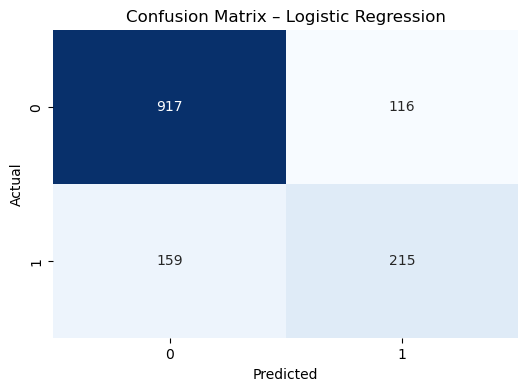

In [35]:
# Confusion Matrix
cm = confusion_matrix(y_test_churn, y_pred_churn)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix – Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [53]:
# Turning for the LOGISTIC REGRESSION CLASSIFICATION MODEL

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling on training and testing data
X_train_scaled = scaler.fit_transform(X_train_churn)
X_test_scaled = scaler.transform(X_test_churn)

print("Feature scaling complete! Data is now standardized.")

Feature scaling complete! Data is now standardized.


In [55]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
sm = SMOTE()

# Resample the training data
X_train_balanced, y_train_balanced = sm.fit_resample(X_train_scaled, y_train_churn)

print("Before balancing:", sum(y_train_churn==1), "churn cases")
print("After balancing:", sum(y_train_balanced==1), "churn cases")


Before balancing: 1495 churn cases
After balancing: 4130 churn cases


In [43]:
# Re-train Logistic Regression on balanced data
log_reg_balanced = LogisticRegression(max_iter=1000)
log_reg_balanced.fit(X_train_balanced, y_train_balanced)

# Predict again
y_pred_balanced = log_reg_balanced.predict(X_test_scaled)

# Evaluate new model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test_churn, y_pred_balanced))

accuracy_balanced = accuracy_score(y_test_churn, y_pred_balanced)
precision_balanced = precision_score(y_test_churn, y_pred_balanced)
recall_balanced = recall_score(y_test_churn, y_pred_balanced)
f1_balanced = f1_score(y_test_churn, y_pred_balanced)

print("\nLogistic Regression Model (After SMOTE Balancing) Performance:")
print(f"Accuracy : {accuracy_balanced:.3f}")
print(f"Precision: {precision_balanced:.3f}")
print(f"Recall   : {recall_balanced:.3f}")
print(f"F1-score : {f1_balanced:.3f}")


[[731 302]
 [ 78 296]]

Logistic Regression Model (After SMOTE Balancing) Performance:
Accuracy : 0.730
Precision: 0.495
Recall   : 0.791
F1-score : 0.609


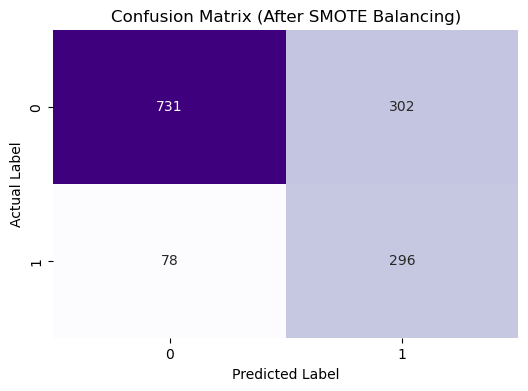

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix visualization
cm_balanced = confusion_matrix(y_test_churn, y_pred_balanced)
plt.figure(figsize=(6,4))
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix (After SMOTE Balancing)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

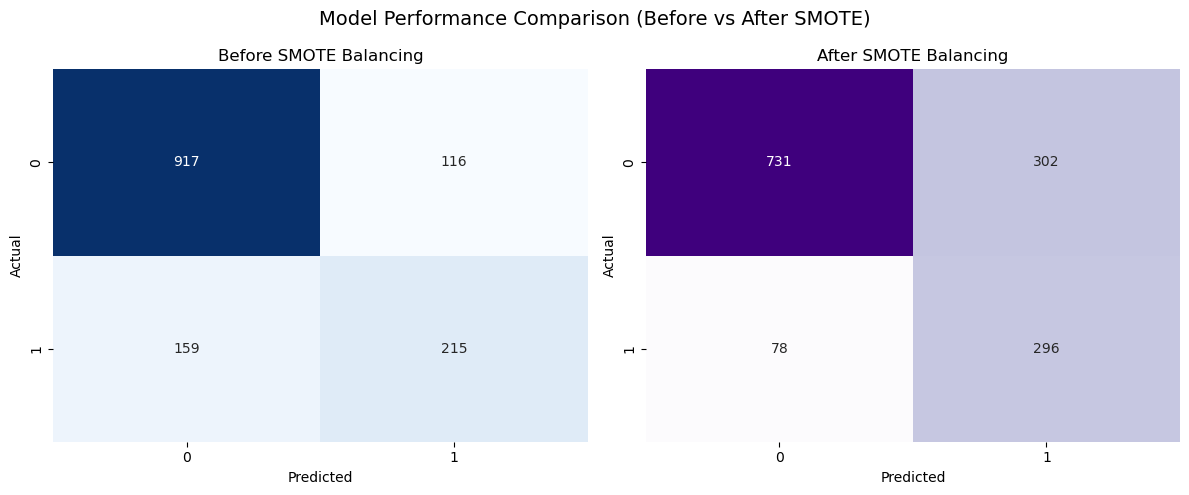

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
cm_before = confusion_matrix(y_test_churn, y_pred_churn)
cm_after = confusion_matrix(y_test_churn, y_pred_balanced)

# Create side-by-side comparison
plt.figure(figsize=(12, 5))

# Plot 1: Before SMOTE
plt.subplot(1, 2, 1)
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Before SMOTE Balancing')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot 2: After SMOTE
plt.subplot(1, 2, 2)
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('After SMOTE Balancing')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Main title for the whole figure
plt.suptitle('Model Performance Comparison (Before vs After SMOTE)', fontsize=14)

plt.tight_layout()
plt.show()


In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Prepare dataset (copy from cleaned df_churn)
df_dnn = df_churn.copy()

# Split into X (features) and y (target)
X_dnn = df_churn_encoded.drop('Churn_Yes', axis=1)
y_dnn = df_churn_encoded['Churn_Yes']

# Split data (train: 80%, test: 20%)
X_train_dnn, X_test_dnn, y_train_dnn, y_test_dnn = train_test_split(
    X_dnn, y_dnn, test_size=0.2, random_state=42, stratify=y_dnn
)

print("DNN Data Prepared Successfully!")
print(f"Training samples: {X_train_dnn.shape[0]}")
print(f"Testing samples : {X_test_dnn.shape[0]}")

DNN Data Prepared Successfully!
Training samples: 5625
Testing samples : 1407


In [63]:
# BUILD & TRAIN DNN MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Build the DNN
model_churn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_dnn.shape[1],)),  # First hidden layer, Converts all negative values to 0
    Dropout(0.3), # randomly turns off 30% of neurons during training
    Dense(32, activation='relu'),                                       # Second hidden layer
    Dense(1, activation='sigmoid')                                      # Output layer (binary)
])

# Compile
model_churn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Automatically adjusts learning rate for each parameter.

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train
history_churn = model_churn.fit(
    X_train_dnn, y_train_dnn,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100


C:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6645 - loss: 24.5502 - val_accuracy: 0.6542 - val_loss: 1.5438
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6659 - loss: 6.7114 - val_accuracy: 0.7520 - val_loss: 1.3228
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.6953 - loss: 4.2447 - val_accuracy: 0.7138 - val_loss: 0.6856
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.6959 - loss: 2.3652 - val_accuracy: 0.4631 - val_loss: 0.9546
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.6919 - loss: 2.0235 - val_accuracy: 0.4053 - val_loss: 1.7712
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7019 - loss: 1.3351 - val_accuracy: 0.7804 - val_loss: 1.0461
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7283 - loss: 1.1367 - val_accuracy: 0.7716 - val_loss: 0.6005
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.7133 - loss: 0.9934 - val_accurac

In [67]:
# EVALUATE PERFORMANCE
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Predict
y_pred_dnn_prob = model_churn.predict(X_test_dnn)
y_pred_dnn = (y_pred_dnn_prob > 0.5).astype(int)

# Evaluate DNN model performance
accuracy_dnn = accuracy_score(y_test_dnn, y_pred_dnn)
precision_dnn = precision_score(y_test_dnn, y_pred_dnn)
recall_dnn = recall_score(y_test_dnn, y_pred_dnn)
f1_dnn = f1_score(y_test_dnn, y_pred_dnn)

print("\nDNN Model (Classification) Performance:")
print(f"Accuracy : {accuracy_dnn:.3f}")
print(f"Precision: {precision_dnn:.3f}")
print(f"Recall   : {recall_dnn:.3f}")
print(f"F1-score : {f1_dnn:.3f}")


# Confusion Matrix
cm_dnn = confusion_matrix(y_test_dnn, y_pred_dnn)
print("Confusion Matrix:\n", cm_dnn)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step

DNN Model (Classification) Performance:
Accuracy : 0.790
Precision: 0.657
Recall   : 0.436
F1-score : 0.524
Confusion Matrix:
 [[948  85]
 [211 163]]


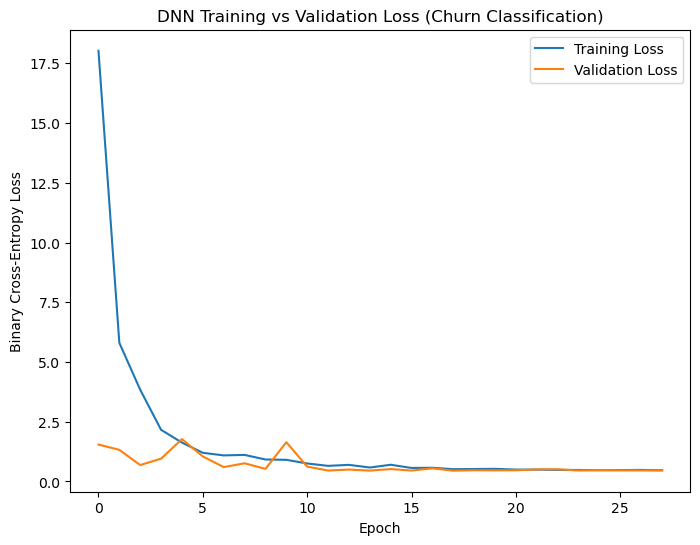

In [69]:
plt.figure(figsize=(8, 6))
plt.plot(history_churn.history['loss'], label='Training Loss')
plt.plot(history_churn.history['val_loss'], label='Validation Loss')
plt.title('DNN Training vs Validation Loss (Churn Classification)')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.legend()
plt.show()

Confusion Matrix:
 [[948  85]
 [211 163]]


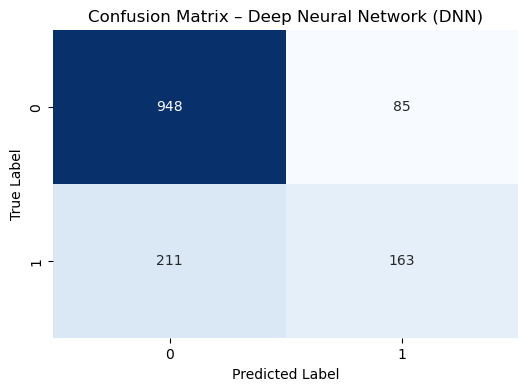

In [71]:
# The confusion matrix summarizes correct and incorrect predictions.
cm = confusion_matrix(y_test_dnn, y_pred_dnn)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix – Deep Neural Network (DNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [77]:
# MODEL B – High-Capacity DNN (More Layers + Neurons)
model_churn_B = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_dnn.shape[1],)),
    Dropout(0.4),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_churn_B.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop_B = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_churn_B = model_churn_B.fit(
    X_train_dnn, y_train_dnn,
    validation_split=0.2,
    epochs=120,
    batch_size=64,    # larger batch to stabilize deeper network
    callbacks=[early_stop_B],
    verbose=1
)


Epoch 1/120


C:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6490 - loss: 29.2792 - val_accuracy: 0.7324 - val_loss: 1.9224
Epoch 2/120
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6514 - loss: 9.4683 - val_accuracy: 0.7351 - val_loss: 0.9520
Epoch 3/120
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6586 - loss: 4.5541 - val_accuracy: 0.7209 - val_loss: 1.0071
Epoch 4/120
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6547 - loss: 3.2367 - val_accuracy: 0.6489 - val_loss: 0.6273
Epoch 5/120
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6413 - loss: 2.1994 - val_accuracy: 0.6996 - val_loss: 0.6129
Epoch 6/120
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6247 - loss: 1.7851 - val_accuracy: 0.7049 - val_loss: 0.6118
Epoch 7/120
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6678 - loss: 1.0655 - val_accuracy: 0.7307 - val_loss: 0.5827
Epoch 8/120
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6956 - loss: 0.8725 - val_accuracy: 0.7573 - val_loss: 0.

In [79]:
# MODEL C – Lightweight DNN + Lower Learning Rate
from tensorflow.keras.optimizers import Adam

model_churn_C = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_dnn.shape[1],)),
    Dropout(0.2),

    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_churn_C.compile(
    optimizer=Adam(learning_rate=0.0005),   # lower LR for smoother convergence
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop_C = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_churn_C = model_churn_C.fit(
    X_train_dnn, y_train_dnn,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop_C],
    verbose=1
)


Epoch 1/100


C:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5297 - loss: 46.5908 - val_accuracy: 0.7556 - val_loss: 14.7460
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.6728 - loss: 16.2148 - val_accuracy: 0.7511 - val_loss: 8.5633
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.6813 - loss: 8.9464 - val_accuracy: 0.7680 - val_loss: 4.7466
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.6701 - loss: 6.7718 - val_accuracy: 0.7556 - val_loss: 2.2755
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.6675 - loss: 4.5224 - val_accuracy: 0.7644 - val_loss: 1.6183
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.6767 - loss: 3.2143 - val_accuracy: 0.7396 - val_loss: 0.8023
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.6839 - loss: 2.6199 - val_accuracy: 0.7644 - val_loss: 0.9184
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.7119 - loss: 1.8959 - val

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }

# Evaluate Model A
y_pred_A = (model_churn.predict(X_test_dnn) > 0.5).astype(int)
result_A = evaluate_model(y_test_dnn, y_pred_A)

# Evaluate Model B
y_pred_B = (model_churn_B.predict(X_test_dnn) > 0.5).astype(int)
result_B = evaluate_model(y_test_dnn, y_pred_B)

# Evaluate Model C
y_pred_C = (model_churn_C.predict(X_test_dnn) > 0.5).astype(int)
result_C = evaluate_model(y_test_dnn, y_pred_C)

print("Model A:", result_A)
print("Model B:", result_B)
print("Model C:", result_C)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model A: {'Accuracy': 0.7896233120113717, 'Precision': 0.657258064516129, 'Recall': 0.4358288770053476, 'F1-score': 0.5241157556270096}
Model B: {'Accuracy': 0.7711442786069652, 'Precision': 0.6101694915254238, 'Recall': 0.3850267379679144, 'F1-score': 0.4721311475409836}
Model C: {'Accuracy': 0.7889125799573561, 'Precision': 0.6509803921568628, 'Recall': 0.44385026737967914, 'F1-score': 0.5278219395866455}


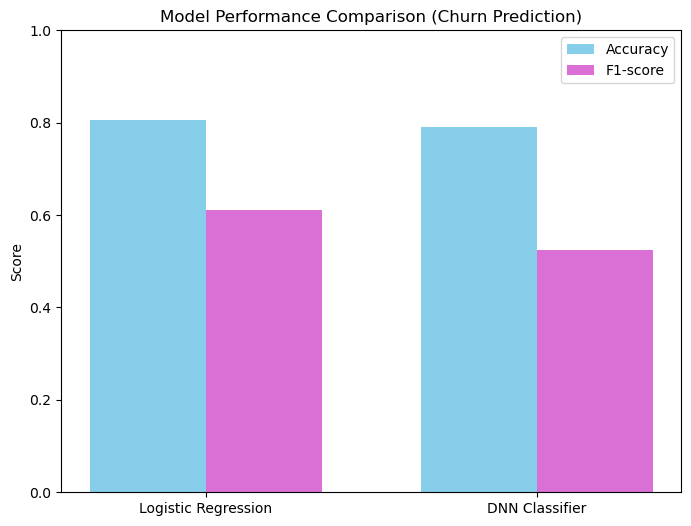

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for comparison
models = ['Logistic Regression', 'DNN Classifier']
accuracy = [0.805, 0.790]
f1 = [0.610, 0.524]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x - width/2, accuracy, width, label='Accuracy', color='skyblue')
plt.bar(x + width/2, f1, width, label='F1-score', color='orchid')

plt.ylabel('Score')
plt.title('Model Performance Comparison (Churn Prediction)')
plt.xticks(x, models)
plt.ylim(0, 1)
plt.legend()
plt.show()
